In [20]:
!pip install torch torchvision matplotlib

In [21]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [22]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to be between -1 and 1
])


In [23]:
# Load the training and test sets
train_dataset = datasets.EMNIST(root='data', split='letters', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='data', split='letters', train=False, download=True, transform=transform)

# Create DataLoader for each set
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [24]:
train_dataset

Dataset EMNIST
    Number of datapoints: 124800
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [25]:
test_dataset

Dataset EMNIST
    Number of datapoints: 20800
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [26]:
!pip install torchvision
import numpy as np
import torchvision

In [27]:
def label_to_char(label):
    return chr(label + 96)  # 'a' corresponds to 1, so 'a' = 97 - 1

def show_emnist_images(images, labels, num_images=16):
    num_rows = int(num_images**0.5)
    num_cols = int(num_images**0.5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)

    for i in range(num_images):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {label_to_char(labels[i].item())}')
        ax.axis('off')

    plt.show()

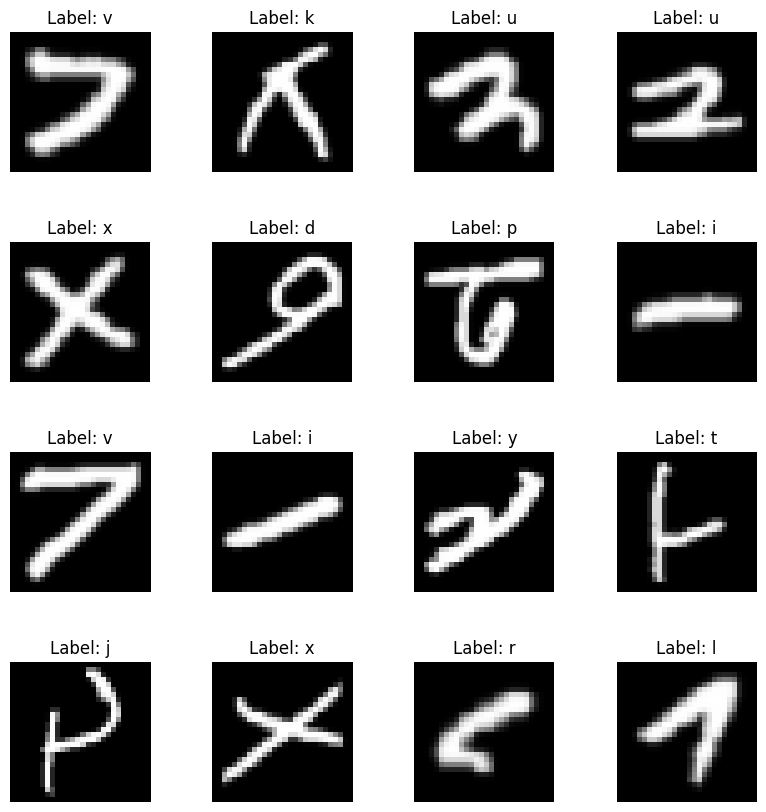

In [28]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
show_emnist_images(images, labels, num_images=16)

In [29]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [31]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 27)  # 26 letters + 1 for 0-based indexing
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = MLP()


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
import torch
epochs =10
train_losses = []
train_correct = []
test_losses = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

#Trainning Phase
    model.train()
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward() #Back propagation
        optimizer.step()

    train_losses.append(loss.item())
    train_accuracy = (trn_corr / len(train_loader.dataset)) * 100
    train_correct.append(train_accuracy)  # Store accuracy directly as percentage

#Testing Phase
    model.eval()
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(X_test.size(0), -1))

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum().item()

            loss = criterion(y_val, y_test)

    test_losses.append(loss.item())
    test_accuracy = (tst_corr / len(test_loader.dataset)) * 100
    test_correct.append(test_accuracy)  # Store accuracy directly as percentage

#display
    print(f'Epoch: {i+1:2} Training Loss: {train_losses[-1]:.4f} Training Accuracy: {train_accuracy:.2f}% Test Loss: {test_losses[-1]:.4f} Test Accuracy: {test_accuracy:.2f}%')


Epoch:  1 Training Loss: 0.5915 Training Accuracy: 72.82% Test Loss: 0.3464 Test Accuracy: 84.23%
Epoch:  2 Training Loss: 0.2862 Training Accuracy: 84.78% Test Loss: 0.1631 Test Accuracy: 88.31%
Epoch:  3 Training Loss: 0.4389 Training Accuracy: 86.88% Test Loss: 0.1530 Test Accuracy: 89.33%
Epoch:  4 Training Loss: 0.4386 Training Accuracy: 87.87% Test Loss: 0.1470 Test Accuracy: 89.91%
Epoch:  5 Training Loss: 0.3284 Training Accuracy: 88.65% Test Loss: 0.1302 Test Accuracy: 90.27%
Epoch:  6 Training Loss: 0.3564 Training Accuracy: 89.16% Test Loss: 0.1960 Test Accuracy: 90.38%
Epoch:  7 Training Loss: 0.4745 Training Accuracy: 89.49% Test Loss: 0.2172 Test Accuracy: 91.01%
Epoch:  8 Training Loss: 0.3516 Training Accuracy: 89.80% Test Loss: 0.1718 Test Accuracy: 90.81%
Epoch:  9 Training Loss: 0.4043 Training Accuracy: 90.14% Test Loss: 0.1251 Test Accuracy: 91.14%
Epoch: 10 Training Loss: 0.3393 Training Accuracy: 90.46% Test Loss: 0.0928 Test Accuracy: 90.88%


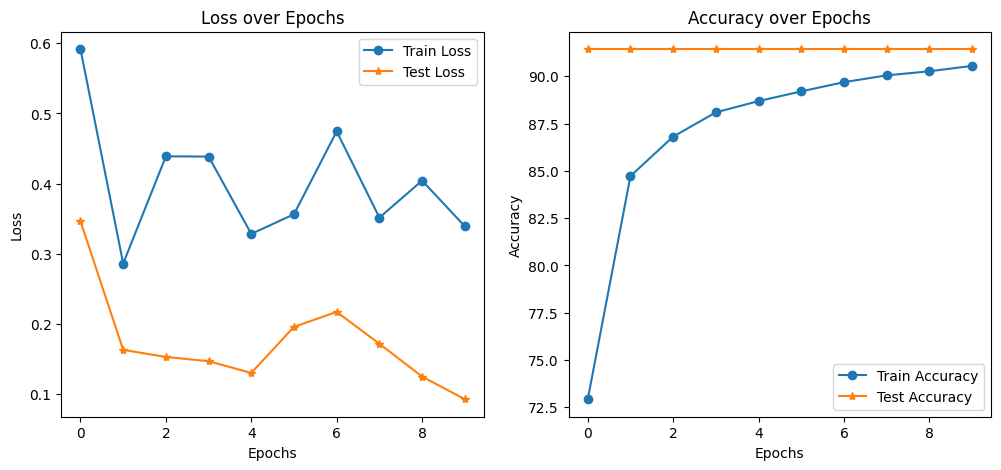

In [34]:
# Plot the training and test losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o' )
plt.plot(test_losses, label='Test Loss', marker='*')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot the training and test accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='*')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()